# ***Part 1***

## PSO compared to Bird flocks:
PSO can be thought of as a simulation of how a flock of birds searches for food. Imagine a flock of birds flying over a vast terrain in search of food. The birds communicate with one another by making small adjustments to their flight paths, and the entire flock moves in the direction of the food source.

Similarly, in PSO, the particles communicate with each other by adjusting their positions and velocities. The position of each particle represents a potential solution to the optimization problem, and the particles “explore” the search space by flying through it.

The particles are attracted toward the best solution found so far, which is analogous to the birds moving toward the food source. As the particles get closer to the best solution, their movement becomes more coordinated and efficient, just as the birds fly in a more synchronized manner as they get closer to the food.

In both cases, the goal is to efficiently navigate a complex landscape in search of an optimal solution. By simulating the behavior of a flock of birds, PSO provides a powerful optimization algorithm that can efficiently search through high-dimensional search spaces to find the best solution.

In [1]:

# import image module 
from IPython.display import Image 
  
# get the image 
Image(url="https://miro.medium.com/v2/resize:fit:786/format:webp/0*ry2R94p8pC1GDG-0.jpg", width=925, height=500) 

## Introduction of PSO:
Particle Swarm Optimization (PSO) is a population-based optimization technique that is inspired by the social behavior of birds flocking, fish schooling or insect swarming. It is a heuristic search algorithm that is used to find the optimal solution to a given problem. The algorithm starts by initializing a population of particles, where each particle represents a possible solution to the problem. Each particle moves in the search space, guided by its own experience and the experience of the swarm, trying to find the optimal solution.

The particles in the swarm move through the search space by adjusting their positions and velocities. The velocity of each particle is updated based on its current position, the best position it has ever visited, and the best position visited by the swarm. The new velocity is a weighted sum of three components: the particle’s current velocity, its best position ever visited, and the swarm’s best position ever visited. This new velocity is used to update the particle’s position.

The particles move through the search space iteratively, and each iteration is called a generation or iteration. During each generation, the fitness of each particle is evaluated, which is a measure of how good the particle’s position is in terms of the problem being solved. The fitness value is then used to update the particle’s best position and the swarm’s best position.

The PSO algorithm continues to iterate through the search space until a stopping criterion is met. The stopping criterion can be a maximum number of iterations or reaching a certain fitness value.
`
In summary, the PSO algorithm is a heuristic search algorithm that iteratively adjusts the positions and velocities of a population of particles to find the optimal solution to a given problem. The algorithm is guided by the experience of each particle and the swarm as a whole. It is a popular optimization algorithm due to its simplicity, efficiency, and effectiveness in solving a wide range of problems.

## Steps involved in PSO:
The Particle Swarm Optimization (PSO) algorithm typically involves the following steps:

1. Initialization: Define the problem domain and initialize the population of particles (candidate solutions) randomly within the domain.
2. Evaluation: Evaluate the fitness of each particle (based on its position).
3. Update the personal best: Update the personal best position of each particle based on its fitness value.
4. Update the global best: Update the global best position based on the best position of all particles.
5. Update velocity and position: Update the velocity and position of each particle based on its current position and velocity, and the personal and global best positions.
6. Termination: Repeat steps 2–5 for a fixed number of iterations or until a stopping criterion is met (e.g. maximum number of iterations reached, target fitness value achieved, etc.).

In each iteration, the velocity of a particle is updated based on its current velocity, its personal best position, and the global best position. The position of a particle is updated based on its current position and the updated velocity. The global best position is updated if a particle has a better personal best position than the current global best position.

The PSO algorithm seeks to optimize a fitness function by adjusting the positions of the particles in the swarm. By iterating through these steps, PSO aims to find the optimal solution within the problem domain.

## Implementation in python
Here is an example of using PSO to optimize the Rastrigin function, which is a popular test function in optimization. The Rastrigin function has many local minima, making it a challenging optimization problem.

Solution: [4.27241853e-06 5.62669881e-06]
Fitness: 3.5576874779508216e-10


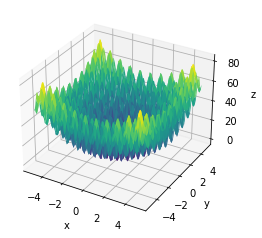

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define the Rastrigin function
def rastrigin(x):
    n = len(x)
    return 10*n + sum([xi**2 - 10*np.cos(2*np.pi*xi) for xi in x])

# Define the PSO algorithm
def pso(cost_func, dim=2, num_particles=30, max_iter=100, w=0.5, c1=1, c2=2):
    # Initialize particles and velocities
    particles = np.random.uniform(-5.12, 5.12, (num_particles, dim))
    velocities = np.zeros((num_particles, dim))

    # Initialize the best positions and fitness values
    best_positions = np.copy(particles)
    best_fitness = np.array([cost_func(p) for p in particles])
    swarm_best_position = best_positions[np.argmin(best_fitness)]
    swarm_best_fitness = np.min(best_fitness)

    # Iterate through the specified number of iterations, updating the velocity and position of each particle at each iteration
    for i in range(max_iter):
        # Update velocities
        r1 = np.random.uniform(0, 1, (num_particles, dim))
        r2 = np.random.uniform(0, 1, (num_particles, dim))
        velocities = w * velocities + c1 * r1 * (best_positions - particles) + c2 * r2 * (swarm_best_position - particles)

        # Update positions
        particles += velocities

        # Evaluate fitness of each particle
        fitness_values = np.array([cost_func(p) for p in particles])

        # Update best positions and fitness values
        improved_indices = np.where(fitness_values < best_fitness)
        best_positions[improved_indices] = particles[improved_indices]
        best_fitness[improved_indices] = fitness_values[improved_indices]
        if np.min(fitness_values) < swarm_best_fitness:
            swarm_best_position = particles[np.argmin(fitness_values)]
            swarm_best_fitness = np.min(fitness_values)

    # Return the best solution found by the PSO algorithm
    return swarm_best_position, swarm_best_fitness

# Define the dimensions of the problem
dim = 2

# Run the PSO algorithm on the Rastrigin function
solution, fitness = pso(rastrigin, dim=dim)

# Print the solution and fitness value
print('Solution:', solution)
print('Fitness:', fitness)

# Create a meshgrid for visualization
x = np.linspace(-5.12, 5.12, 100)
y = np.linspace(-5.12, 5.12, 100)
X, Y = np.meshgrid(x, y)
Z = rastrigin([X, Y])

# Create a 3D plot of the Rastrigin function
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

# Plot the solution found by the PSO algorithm
ax.scatter(solution[0], solution[1], fitness, color='red')

plt.show()

# ***Part 2***

**Particle swarm optimization (PSO)** is a population-based optimization algorithm inspired by the social behavior of birds flocking or fish schooling. In PSO, a group of candidate solutions (particles) moves through the search space in search of the optimal solution. Each particle has a position and velocity, which are updated iteratively based on its own experience and that of the group, in order to move toward the best solution. By simulating this social behavior and iterative updating, PSO can efficiently explore the search space and find good solutions to optimization problems.

#### Advantages:
- It is a simple optimization algorithm that is easy to understand and implement.
- It does not require gradient information, making it suitable for non-differentiable and discontinuous objective functions.
- It can search the entire solution space and can find multiple solutions in a single run.
- It has the ability to escape from local optima due to its stochastic nature.
- It can be used in a wide range of applications, including optimization problems in engineering, finance, and healthcare.

#### Disadvantages:
- It is not guaranteed to find the global optimum and can converge to a local optimum.
- The performance of PSO depends heavily on the selection of the algorithm parameters, which can be time-consuming and require a lot of experimentation.
- PSO can suffer from premature convergence, which occurs when the particles converge too quickly to a suboptimal solution.
- It can be computationally expensive, especially for high-dimensional problems with a large number of particles.
- It can be sensitive to noise in the objective function, which can lead to inaccurate results.

Implementation in python:
This code minimizes the function `f(x, y) = x^2 + y^2` using particle swarm optimization. The search space is defined by the bounds `[-5, 5]` in both dimensions. The algorithm starts with `num_particles = 20` particles randomly distributed in the search space. The particles are updated for a maximum of `max_iterations = 100 iterations`. The particles' velocity and position are updated based on their best position and the global best.

Iteration 1: Best value = 0.0298
Iteration 2: Best value = 0.0298
Iteration 3: Best value = 0.0016
Iteration 4: Best value = 0.0016
Iteration 5: Best value = 0.0016
Iteration 6: Best value = 0.0016
Iteration 7: Best value = 0.0016
Iteration 8: Best value = 0.0016
Iteration 9: Best value = 0.0016
Iteration 10: Best value = 0.0016
Iteration 11: Best value = 0.0016
Iteration 12: Best value = 0.0016
Iteration 13: Best value = 0.0000
Iteration 14: Best value = 0.0000
Iteration 15: Best value = 0.0000
Iteration 16: Best value = 0.0000
Iteration 17: Best value = 0.0000
Iteration 18: Best value = 0.0000
Iteration 19: Best value = 0.0000
Iteration 20: Best value = 0.0000
Iteration 21: Best value = 0.0000
Iteration 22: Best value = 0.0000
Iteration 23: Best value = 0.0000
Iteration 24: Best value = 0.0000
Iteration 25: Best value = 0.0000
Iteration 26: Best value = 0.0000
Iteration 27: Best value = 0.0000
Iteration 28: Best value = 0.0000
Iteration 29: Best value = 0.0000
Iteration 30: Best valu

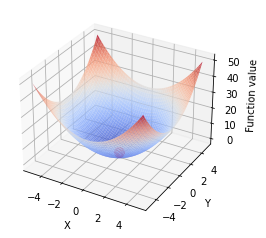

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define the function to minimize
def function(x, y):
    return x**2 + y**2

# Set the bounds of the search space
bounds = [-5, 5]

# Set the parameters of the algorithm
num_particles = 20
max_iterations = 100
c1 = 2
c2 = 2
w = 0.7

# Initialize the particles
particles_position = np.random.uniform(low=bounds[0], high=bounds[1], size=(num_particles, 2))
particles_velocity = np.zeros((num_particles, 2))
particles_best_position = particles_position.copy()
particles_best_value = np.array([function(x, y) for x, y in particles_position])

# Initialize the global best position
global_best_index = np.argmin(particles_best_value)
global_best_position = particles_best_position[global_best_index]
global_best_value = particles_best_value[global_best_index]

# Run the algorithm
for i in range(max_iterations):
    # Update the particles velocity and position
    r1 = np.random.uniform(size=(num_particles, 2))
    r2 = np.random.uniform(size=(num_particles, 2))
    particles_velocity = w * particles_velocity \
                        + c1 * r1 * (particles_best_position - particles_position) \
                        + c2 * r2 * (global_best_position - particles_position)
    particles_position = particles_position + particles_velocity
    
    # Apply the bounds
    particles_position = np.clip(particles_position, bounds[0], bounds[1])
    
    # Update the particles best position and value
    new_particles_best_value = np.array([function(x, y) for x, y in particles_position])
    mask = new_particles_best_value < particles_best_value
    particles_best_position[mask] = particles_position[mask]
    particles_best_value[mask] = new_particles_best_value[mask]
    
    # Update the global best position and value
    global_best_index = np.argmin(particles_best_value)
    global_best_position = particles_best_position[global_best_index]
    global_best_value = particles_best_value[global_best_index]
    
    # Print the best value in the current iteration
    print('Iteration {}: Best value = {:.4f}'.format(i+1, global_best_value))

# Plot the function and the global best position
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = np.linspace(bounds[0], bounds[1], 100)
y = np.linspace(bounds[0], bounds[1], 100)
X, Y = np.meshgrid(x, y)
Z = function(X, Y)

ax.plot_surface(X, Y, Z, cmap='coolwarm', alpha=0.8)
ax.scatter(global_best_position[0], global_best_position[1], global_best_value, color='red', s=100)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Function value')
plt.show()


## Refrences

1. https://induraj2020.medium.com/implementing-particle-swarm-optimization-in-python-c59278bc5846
2. https://induraj2020.medium.com/implementing-particle-swarm-optimization-part-2-1b0d1614dcbf